# *TP2 Mouvement Brownien*

*Professeur: Jules Flin*

*Étudiants: Gustavo Melo Scheidt Paulino & Jose Luis Rativa Medina*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 1. *Simulation du mouvement brownien*
Dans cet exercice, on cherche à produire des simulations du mouvement brownien. On rappelle que le mouvement brownien standard est un processus
à accroissements indépendants, stationnaires et gaussiens, et dont les trajectoires sont p.s. continues.

**1.** Écrire une fonction $bm(T,...)$ qui trace une trajectoire du mouvement brownien standard sur $[0, T]$. On pourra ajouter d’autres arguments.

**2.** Adapter la fonction précédente pour tracer une trajectoire du mouvement brownien, avec drift $μ$ variance ${σ}^2$ et partant de $x ∈ \mathbb{R}$.

**3.** Adapter les fonctions précédentes pour tracer une trajectoire d’un mouvement brownien bidimensionnel.

**4.** Adapter les fonctions précédentes pour tracer une trajectoire d’un mouvement brownien tridimensionnel.

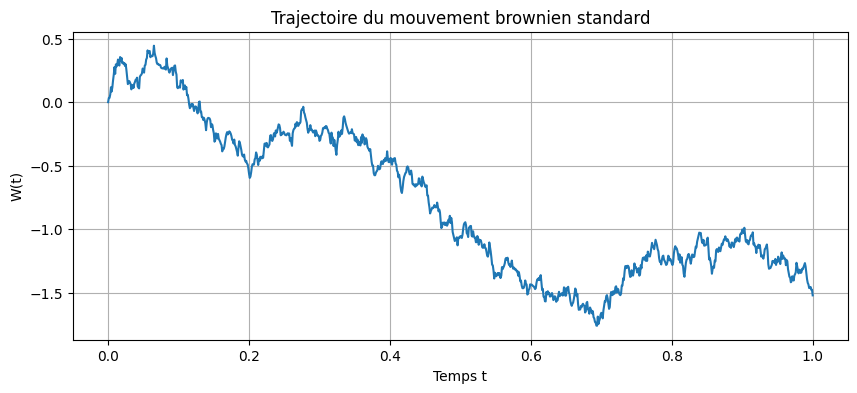

(array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([ 0.        ,  0.03319038,  0.03382792, ..., -1.47784337,
        -1.47635761, -1.52146041]))

In [ ]:
#Réponse Exercice 1.1
def bm(T, N=1000):

    dt = T / N
    t = np.linspace(0, T, N+1)        # temps discretisé (continu pour la math en papier mais pour la machine, on doit discretiser)
    W = np.zeros(N+1)                 # on commence à 0
    W[1:] = np.cumsum(np.sqrt(dt) * np.random.randn(N))  # incréments gaussiens indépendants
    """
    np.cumsum calcule la somme cumulée des éléments d’une array,
    permet de reconstruire la trajectoire du mouvement brownien
    en sommant les petits incréments gaussiens successifs.
    """

    # Tracé de la trajectoire
    plt.figure(figsize=(10, 4))
    plt.plot(t, W)
    plt.title('Trajectoire du mouvement brownien standard')
    plt.xlabel('Temps t')
    plt.ylabel('W(t)')
    plt.grid(True)
    plt.show()

    return t, W

bm(1)

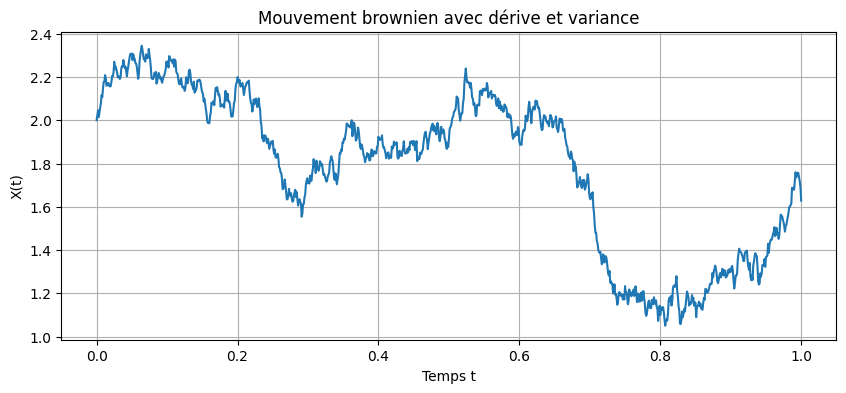

(array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([2.        , 2.02470955, 2.04613211, ..., 1.71714126, 1.68966749,
        1.62852945]))

In [ ]:
#Réponse Exercice 1.2
def bm_avec_drift(T, N=1000, mu=0.5, sigma=1.0, x0=0):

    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    W[1:] = np.cumsum(np.sqrt(dt) * np.random.randn(N))  # partie brownienne
    X = x0 + mu * t + sigma * W                          # on ajoute la dérive et la variance (la formule est comme on a vu en cours)

    # graph
    plt.figure(figsize=(10, 4))
    plt.plot(t, X)
    plt.title('Mouvement brownien avec dérive et variance')
    plt.xlabel('Temps t')
    plt.ylabel('X(t)')
    plt.grid(True)
    plt.show()

    return t, X

bm_avec_drift(1, mu=1.0, sigma=0.8, x0=2)


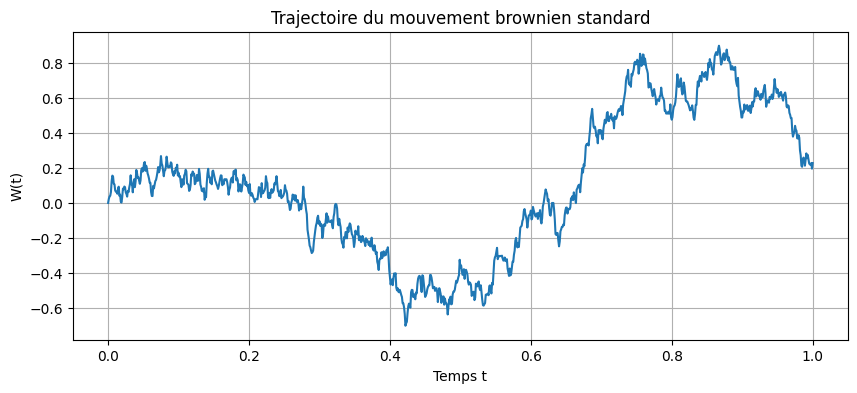

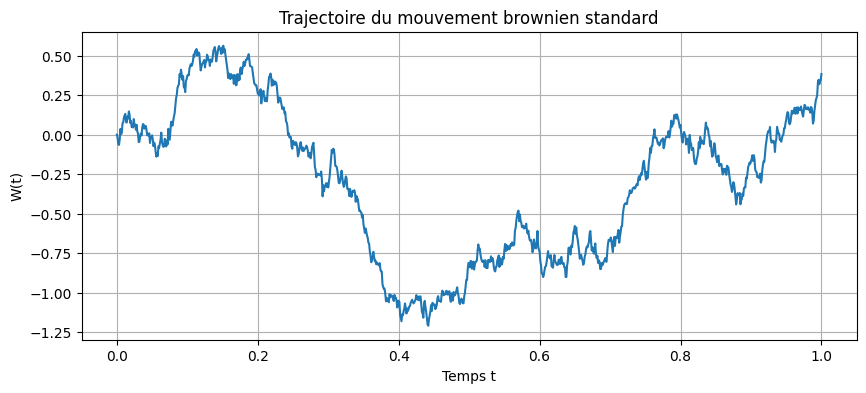

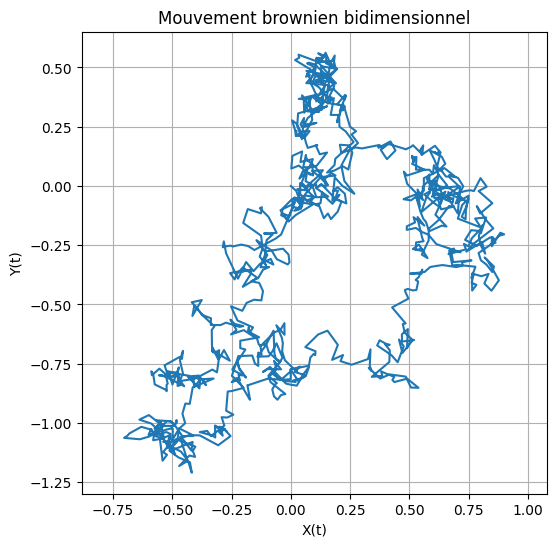

(array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([0.        , 0.02332256, 0.03659394, ..., 0.22795254, 0.19630813,
        0.22816794]),
 array([ 0.        , -0.02165753, -0.06072286, ...,  0.33549682,
         0.34567918,  0.3831866 ]))

In [ ]:
  #Réponse Exercice 1.3 sans vecteur gaussien
def bm_2d(T, N=1000):
    t = np.linspace(0, T, N+1)

    x = bm(T, N)[1]  # première composante
    y = bm(T, N)[1]  # deuxième composante

    # graph
    plt.figure(figsize=(6, 6))
    plt.plot(x, y)
    plt.title('Mouvement brownien bidimensionnel')
    plt.xlabel('X(t)')
    plt.ylabel('Y(t)')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    return t, x, y

bm_2d(1)


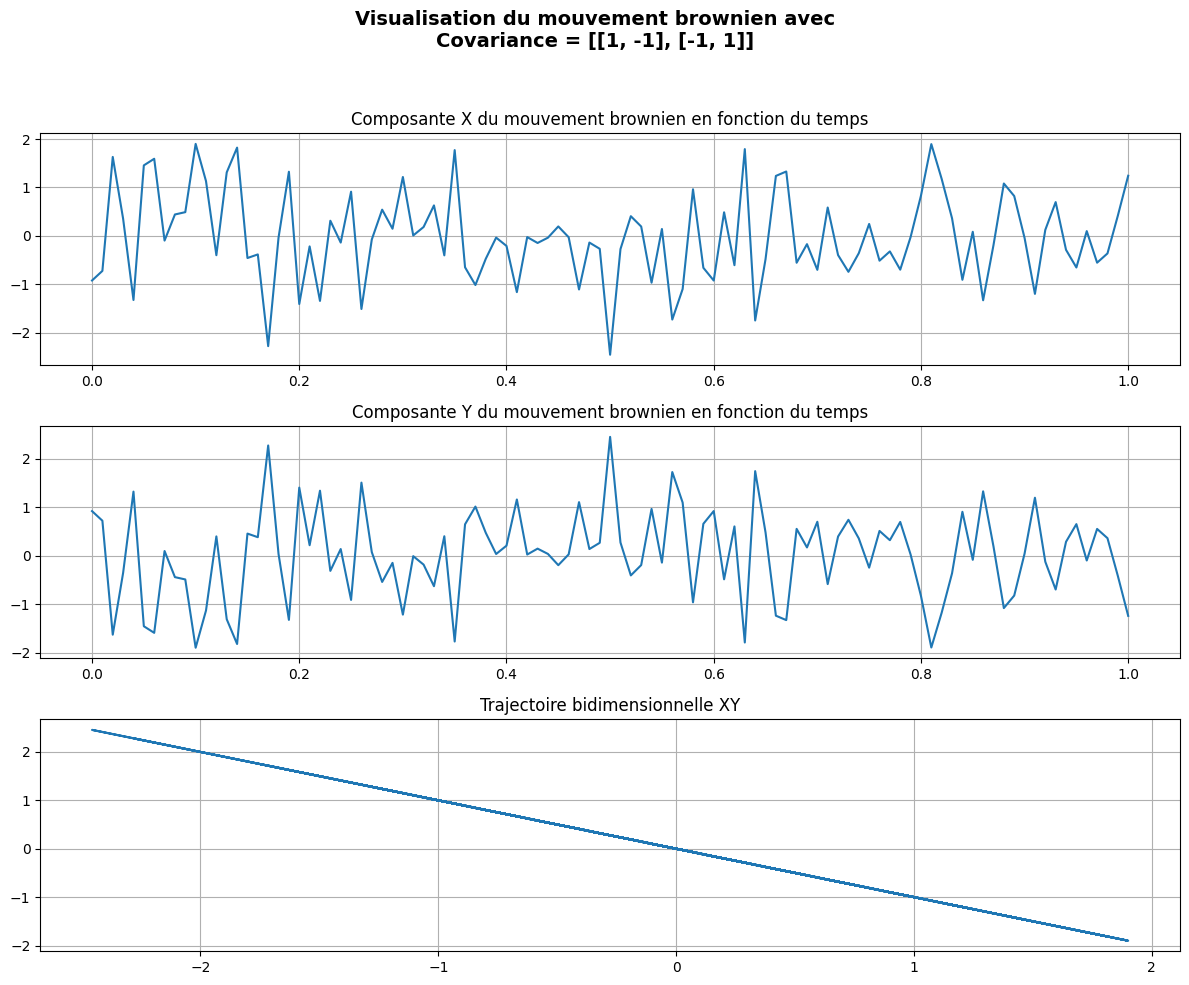

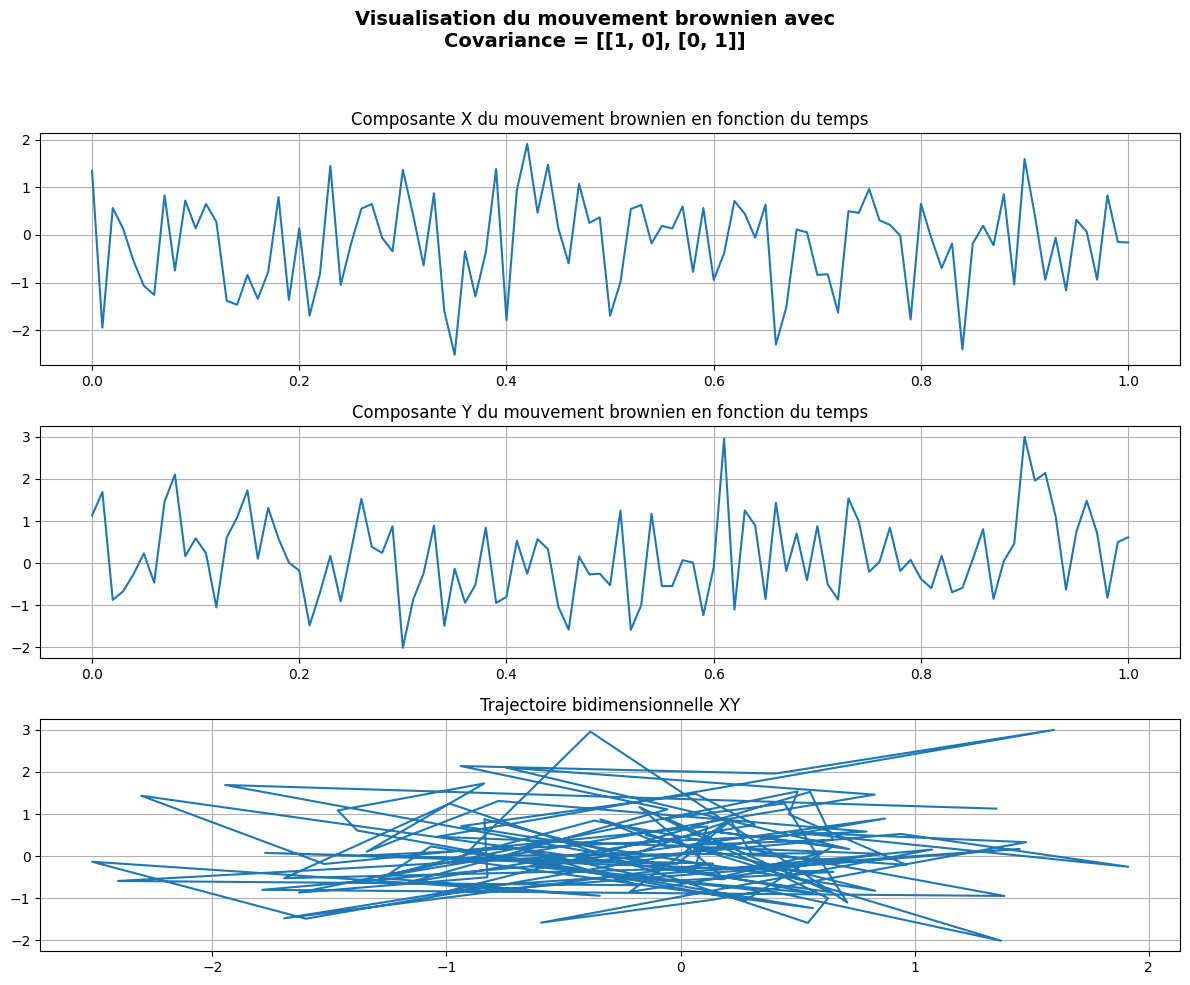

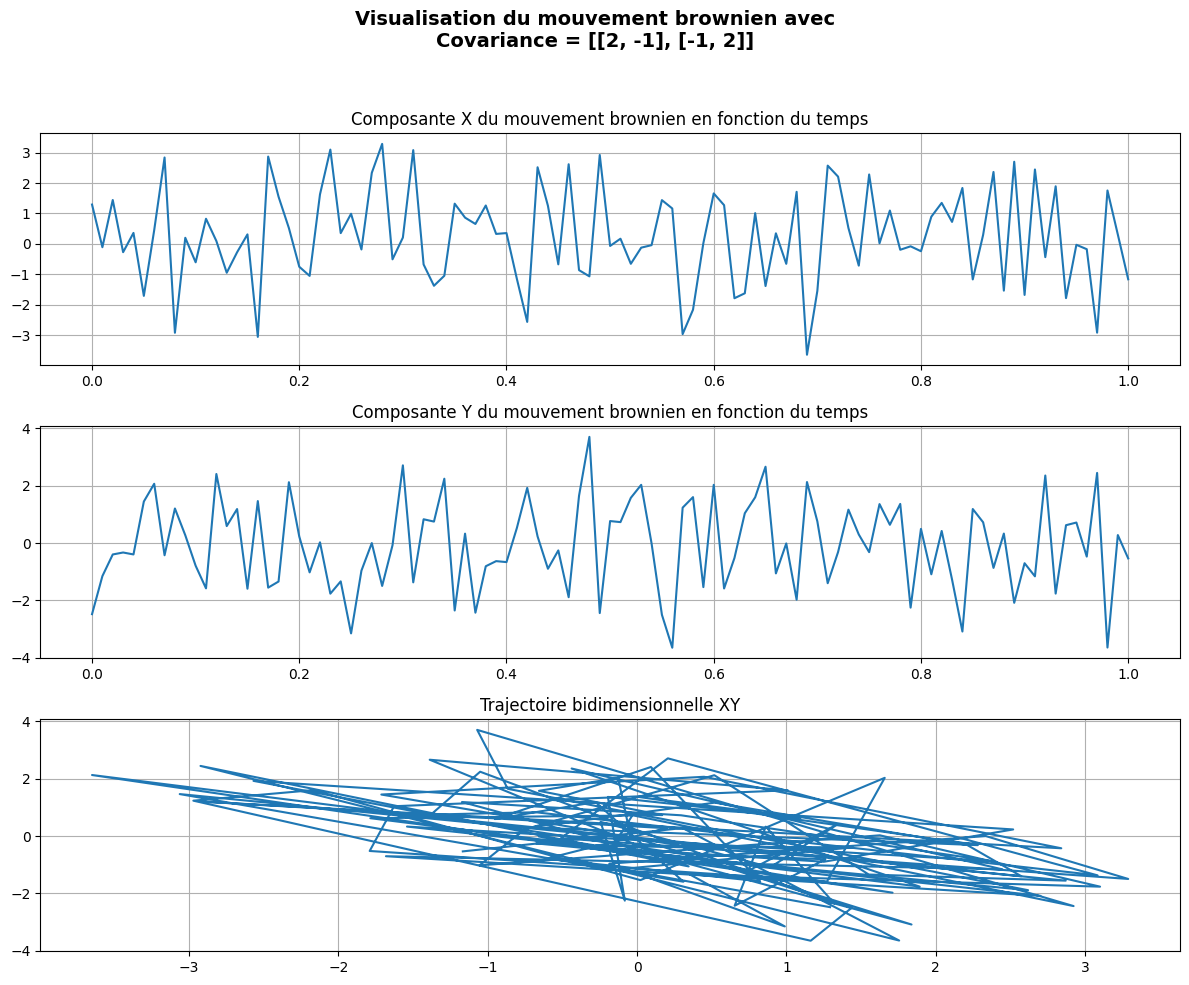

In [85]:
  #Réponse Exercice 1.3 avec vecteur gaussienne
def bm_2d(T, N=100):
    t = np.linspace(0, T, N+1)

    mean = [0, 0]
    covs = [
        [[1, -1], [-1, 1]],
        [[1, 0], [0, 1]],
        [[2, -1], [-1, 2]]
    ]

    for idx, cov in enumerate(covs):
        W = np.random.multivariate_normal(mean, cov, N+1)

        fig, axs = plt.subplots(3, 1, figsize=(12, 10))
        fig.suptitle(f"Visualisation du mouvement brownien avec\nCovariance = {cov}", fontsize=14, fontweight='bold')

        axs[0].plot(t, W[:, 0], linestyle="-", label="X(t)")
        axs[0].set_title('Composante X du mouvement brownien en fonction du temps')
        axs[0].grid(True)

        axs[1].plot(t, W[:, 1], linestyle="-", label="Y(t)")
        axs[1].set_title('Composante Y du mouvement brownien en fonction du temps')
        axs[1].grid(True)

        axs[2].plot(W[:, 0], W[:, 1], linestyle="-", label="X(t) vs Y(t)")
        axs[2].set_title('Trajectoire bidimensionnelle XY')
        axs[2].grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        """
        On a essayé de créer une fonction W de vecteurs gaussiens et plotter un par un
        et après un plot avec les deux ensembles
        """
    return

bm_2d(1)


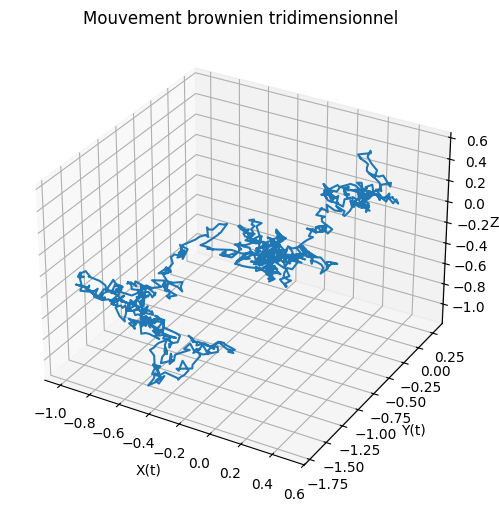

(array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([ 0.02625176,  0.00530878, -0.00814329, ..., -0.84083665,
        -0.80479659, -0.78583555]),
 array([ 0.05060965,  0.07849498,  0.1428744 , ..., -1.15102865,
        -1.19008772, -1.16982852]),
 array([-0.04659464, -0.08189962, -0.04277391, ..., -0.716823  ,
        -0.67677574, -0.6543124 ]))

In [ ]:
#Réponse Exercice 1.4
def bm_3d(T, N=1000):
    t = np.linspace(0, T, N+1)
    dt = T / N
    x = np.cumsum(np.sqrt(dt) * np.random.randn(N+1)) #bm pour chacunes des variables
    y = np.cumsum(np.sqrt(dt) * np.random.randn(N+1))
    z = np.cumsum(np.sqrt(dt) * np.random.randn(N+1))

    # graph
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')  # pour faire le 3D
    ax.plot(x, y, z)
    ax.set_title('Mouvement brownien tridimensionnel')
    ax.set_xlabel('X(t)')
    ax.set_ylabel('Y(t)')
    ax.set_zlabel('Z(t)')
    plt.show()

    return t, x, y, z

bm_3d(1)

### Exercice 2. *Quelques propriétés du mouvement brownien standard*

**1.**  On rappelle que le mouvement brownien standard vérifie le principe de réflexion :  
pour tout $a > 0$ et tout $t > 0$,

$$\mathbb{P}\left( \sup_{s \leq t} B_s \geq a \right) = 2\mathbb{P}(B_t \geq a) = \mathbb{P}(|B_t| \geq a)$$

Illustrer cette propriété à l’aide d’une méthode de Monte-Carlo.

**2.**  Dans cette question, on s’intéresse à la distribution de

$$Y := \arg\max \{ B_s : s \in [0, 1] \}$$

Écrire un programme qui génère un $K$-échantillon de $Y$, trace un histogramme.  
Comparer cet histogramme avec la densité de la loi arc sinus :

$$f(x) = \frac{1}{\pi \sqrt{x(1 - x)}}$$


**3.**  On se donne $a > 0$ et $b > 0$. Notons :

$$T_{-a} := \inf \{ t > 0 : B_t = -a \}, \quad T_b := \inf \{ t > 0 : B_t = b \}$$

et

$$T := T_{-a} \wedge T_b$$

Comme pour la marche aléatoire symétrique simple sur $\mathbb{Z}$, on a
$$\mathbb{P}(T=T_b)=\frac{a}{a+b}$$

Vérifier cette affirmation numériquement.


In [ ]:
#Réponse Exercice 2.1
def reflexion(a=1.0, t=1.0, N=10000, M=1000):
    """
        Notions qu'on a utilisé dans l'exercice
        N : nombre de trajectoires simulées (échantillons de Monte Carlo)
        M : pas de discrétisation temporelle par trajectoire
    Ce que nous avons compris du principe de réflexion:
    La probabilité que le brownien ait franchi la barrière "a" avant l'instant t
    est deux fois supérieure à la probabilité d'être au-dessus de "a" à l'instant t,
    ou égale à la probabilité d'avoir une grandeur supérieure à "a".
    """

    dt = t / M          # pas/interval de temps
    sup_vals = []       # liste des max B_s sur chaque trajectoire
    final_vals = []     # liste des valeurs finales B_t

    for _ in range(N):
        W = np.cumsum(np.sqrt(dt) * np.random.randn(M))  # trajectoire brownienne simulée
        sup_vals.append(np.max(W))      # maximum sur [0, t]
        final_vals.append(W[-1])        # valeur finale B_t

    sup_vals = np.array(sup_vals)
    final_vals = np.array(final_vals)

    # estimations des probabilités selon le principe de réflexion
    p1 = np.mean(sup_vals > a)              # P(sup B_s > a)
    p2 = 2 * np.mean(final_vals > a)        # 2 * P(B_t > a)
    p3 = np.mean(np.abs(final_vals) > a)    # P(|B_t| > a)

    print("Résultats :")
    print(f"P(sup B_s > a)     ≈ {p1:.4f}")
    print(f"2 × P(B_t > a)     ≈ {p2:.4f}")
    print(f"P(|B_t| > a)       ≈ {p3:.4f}")

    return

reflexion(a=1.0, t=1.0)

Résultats :
P(sup B_s > a)     ≈ 0.3121
2 × P(B_t > a)     ≈ 0.3308
P(|B_t| > a)       ≈ 0.3276


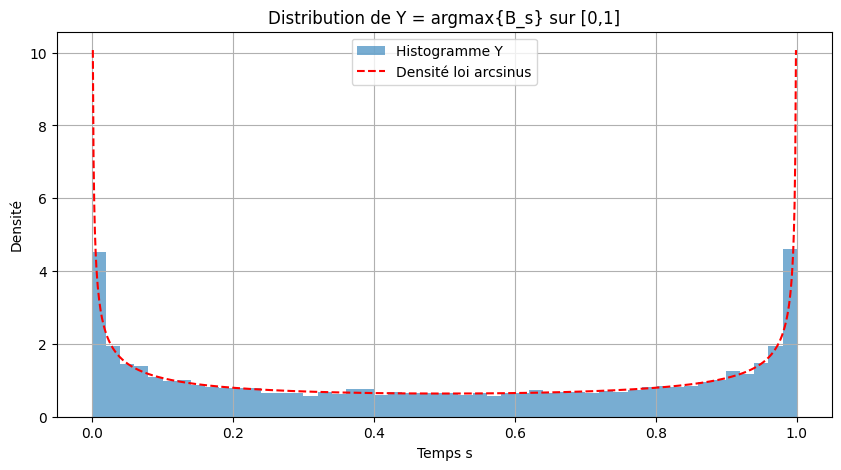

In [ ]:
#Réponse Exercice 2.2
def Y_argmax(K=10000, M=1000):
    argmax_vals = []
    t = np.linspace(0, 1, M)
    dt = 1 / M

    for _ in range(K):
        W = np.cumsum(np.sqrt(dt) * np.random.randn(M)) #génère une trajectoire brownienne
        idx_max = np.argmax(W)       # on trouve l’indice où la trajectoire atteint son maximum
        argmax_vals.append(t[idx_max])  # instant correspondant à ce maximum

    # Histogramme des argmax simulés
    plt.figure(figsize=(10, 5))
    plt.hist(argmax_vals, bins=50, density=True, alpha=0.6, label="Histogramme Y")

    # Densité de la loi arcsinus
    x = np.linspace(0.001, 0.999, 1000) # génère un array de 1000 valeurs régulièrement espacées entre 0,001 et 0,999
    f = 1 / (np.pi * np.sqrt(x * (1 - x))) # fonction f du problème
    plt.plot(x, f, 'r--', label='Densité loi arcsinus')

    plt.title("Distribution de Y = argmax{B_s} sur [0,1]")
    plt.xlabel("Temps s")
    plt.ylabel("Densité")
    plt.legend()
    plt.grid(True)
    plt.show()

    return

Y_argmax()


L’histogramme montre la distribution empirique de l’instant où le mouvement brownien atteint son maximum sur l’intervalle [0,1].
On observe une bonne concordance avec la densité de la loi arcsinus (courbe rouge), qui théoriquement décrit la loi de Y = argmax{Bₛ}.
Comme prévu, la probabilité est plus élevée près des bords (s ≈ 0 ou s ≈ 1), ce qui confirme la nature "U" de cette loi.



In [ ]:
#Réponse Exercice 2.3
def probabilite_infs(a=1.0, b=2.0, N=10000, dt=0.001):

    reussites = 0  # nombre de fois où B_t atteint b avant -a

    for _ in range(N):
        x = 0
        while -a < x < b:
            x += np.sqrt(dt) * np.random.randn() # simule la trajectoire d'un MB, avec debut en x=0 et petits pas aleatoires Δx ~ N(0, dt), jusqu'à quitter l'intervalle (-a, b)
            """
            np.random.randn() → génère un échantillon de 𝑁(0,1)
            np.sqrt(dt) → transforme ceci en 𝑁(0,dt)
            Ainsi, chaque pas simule l'increment B_{t+Δt} - B_t, et acumulant ces pas, on
            obtient la trajectoire B_t, comme
            x{i+1} = x_i + sqrt(dt). Zi, avec Zi ~ N(0, 1)
            """
        if x >= b:
            reussites += 1      # si le processus sort du côté supérieur (c'est-à-dire s'il a atteint b avant -a), cela compte comme un succès.

    p_estimee = reussites / N   # ici on calcule la fréquence relative des trajectoires qui ont atteint b en premier.
    p_theorique = a / (a + b)   # pour finir, on calcule la valeur théorique de la probabilité selon la formule du exercice

    print("Résultat numérique :")
    print(f"P(T = T_b) estimée  ≈ {p_estimee:.4f}")
    print(f"P(T = T_b) théorique = {p_theorique:.4f}")

    return p_estimee, p_theorique

probabilite_infs(a=1.0, b=2.0)


Résultat numérique :
P(T = T_b) estimée  ≈ 0.3386
P(T = T_b) théorique = 0.3333


(0.3386, 0.3333333333333333)

### Exercice 3. *Autour du Théorème de Donsker*

Dans cet exercice, on illustre un résultat incontournable à propos du mouvement brownien : c’est la limite d’échelle d’une marche aléatoire discrète! Plus précisément, le théorème de Donsker peut s’énoncer de la manière suivante :  
soit $(X_n)_n$ une suite de variables aléatoires i.i.d. de carrés intégrables, centrées et réduites.  

On note $(S_n)_n$ la marche aléatoire associée :

$$
S_n := \sum_{k=1}^n X_k
$$

On interpole et normalise les trajectoires de cette marche aléatoire :

$$
X_n(t) := \frac{1}{\sqrt{n}} \left( S_{\lfloor nt \rfloor} + \{nt\} X_{\lfloor nt \rfloor + 1} \right)
$$

$(X_n(t))_t$ est une variable aléatoire à valeurs dans $[0,1]$,  
et elle converge en loi vers un mouvement brownien standard.


**1.** Écrire un programme qui trace les trajectoires de $(S_n)_n$, jusqu’à un instant $N$.  
**2.** Écrire un programme qui trace le graphe de $X_n$ pour un $n$ fixé.  
**3.** Illustrer le résultat de Donsker en simulant $X_n$ pour un $n$ suffisamment grand.


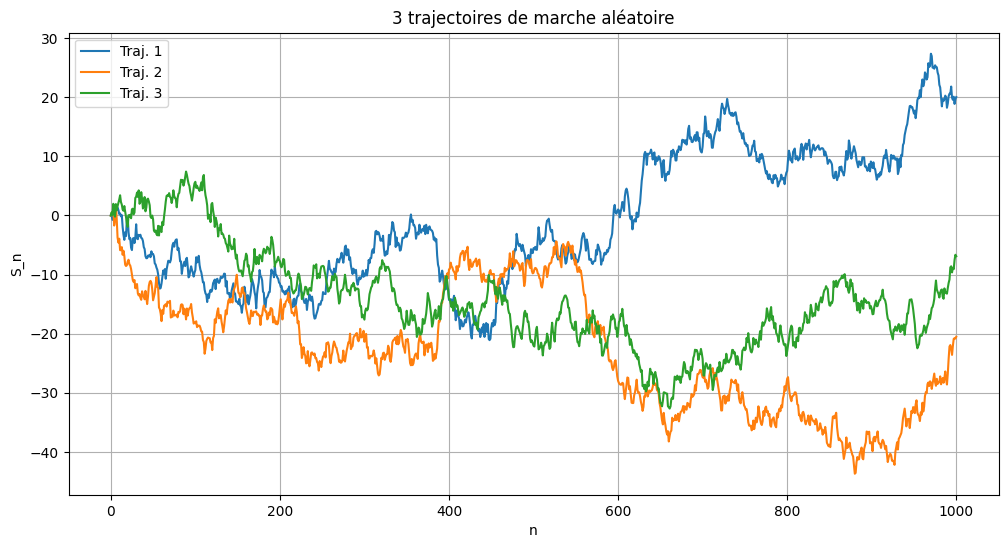

In [ ]:
#Réponse Exercice 3.1 sans orthonormalisation

def traj_Sn(N, n_trajs):
    plt.figure(figsize=(12, 6))

    for j in range(n_trajs):
        #generer X_n (iid)
        X_K = []
        for i in range(N):
            xi = np.random.normal(0, 1)
            X_K.append(xi)

        #somme cumulée des pas à chaque instant
        S = [0]
        somme = 0
        for i in range(N):
            somme += X_K[i]
            S.append(somme)

        plt.plot(range(N + 1), S, label=f"Traj. {j+1}")

    #graphique
    plt.xlabel("n")
    plt.ylabel("S_n")
    plt.title(f"{n_trajs} trajectoires de marche aléatoire")
    plt.grid(True)
    plt.legend()
    plt.show()

traj_Sn(N=1000, n_trajs=3)

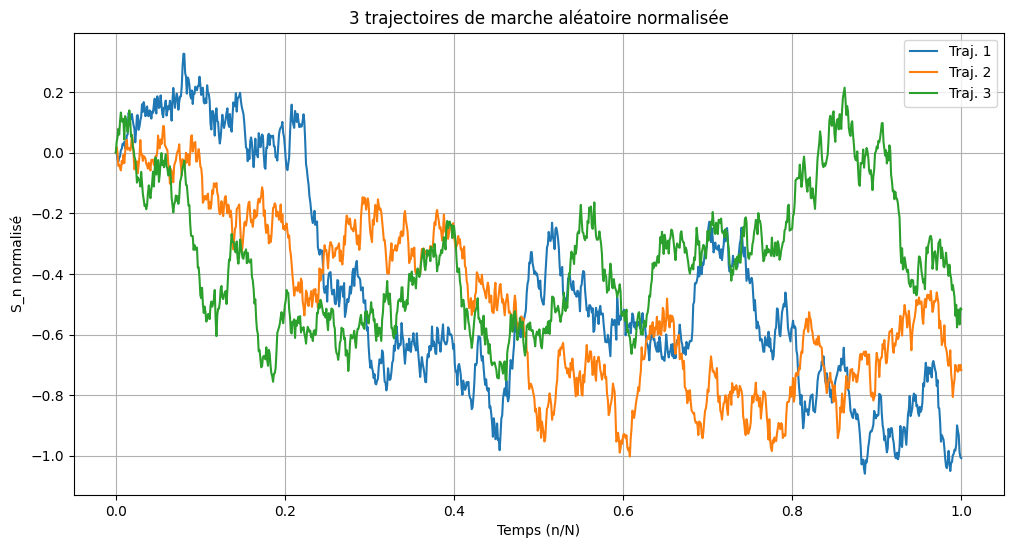

In [ ]:
#Réponse Exercice 3.1 avec orthonormalisation

def traj_Sn(N, n_trajs):
    plt.figure(figsize=(12, 6))

    for j in range(n_trajs):
        #generer X_n (iid)
        X_K = []
        for i in range(N):
            xi = np.random.normal(0, 1)
            X_K.append(xi)

        #somme cumulée des pas à chaque instant
        S = [0]
        somme = 0
        for i in range(N):
            somme += X_K[i]
            S.append(somme / np.sqrt(N))  # normalisation

        #axe x normalisé : t = k/N
        temps = []
        for i in range(N + 1):
            temps.append(i / N)
        plt.plot(temps, S, label=f"Traj. {j+1}")

    #graphique
    plt.xlabel("Temps (n/N)")
    plt.ylabel("S_n normalisé")
    plt.title(f"{n_trajs} trajectoires de marche aléatoire normalisée")
    plt.grid(True)
    plt.legend()
    plt.show()

traj_Sn(N=1000, n_trajs=3)

In [ ]:
#Réponse Exercice 3.2

def Xn_donsker(n, nb_points=None):
    if nb_points is None:
        nb_points = n * 10

    #generer X_n (iid)
    X_K = []
    for i in range(n + 1):
        xi = np.random.normal(0, 1)
        X_K.append(xi)

    #somme cumulée des pas à chaque instant
    S = [0]
    somme = 0
    for i in range(n):
        somme += X_K[i]
        S.append(somme)

    #construire X_n(t) - t dans ([0, 1])
    t_vals = np.linspace(0, 1, nb_points)
    Xn_vals = []

    for t in t_vals:
        k = int(np.floor(n * t))         # partie entière de n*t
        frac = n * t - k                 # partie décimale
        Sn_k = S[k]
        if k < n:
          X_kplus1 = X_K[k]
        else:
          X_kplus1 = 0
        Xn_t = (1 / np.sqrt(n)) * (Sn_k + frac * X_kplus1)
        Xn_vals.append(Xn_t)

    #graphique
    plt.figure(figsize=(10, 5))
    plt.plot(t_vals, Xn_vals, label=f"X_n(t) avec n={n}")
    plt.xlabel("t")
    plt.ylabel("X_n(t)")
    plt.title("Interpolation et normalisation d'une marche aléatoire")
    plt.grid(True)
    plt.legend()
    plt.show()


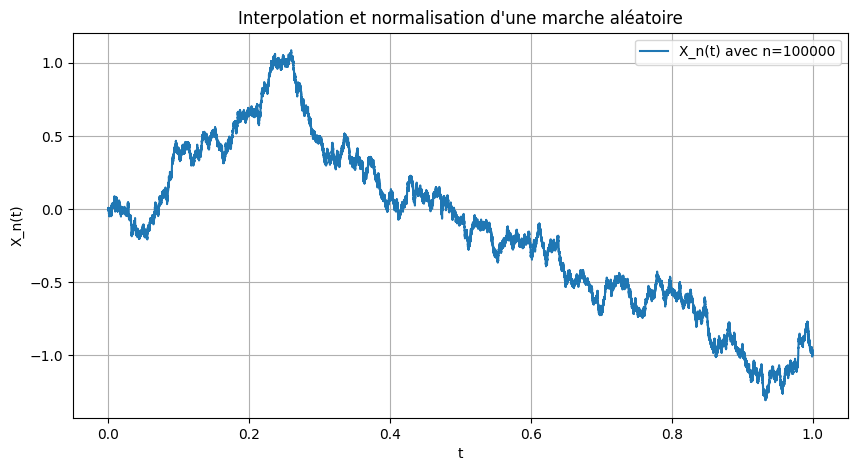

In [ ]:
#Réponse Exercice 3.3
Xn_donsker(n=100000)

### Exercice 4. *Des variantes du mouvement brownien*

Dans ce dernier exercice, on simule quelques variantes du mouvement brownien,  
fréquemment rencontrées dans des applications.


**1.** *(mouvement brownien géométrique)*  
Le mouvement brownien géométrique représente, dans le modèle de Black-Scholes, le prix d’une action en bourse.  
On se donne pour valeur initiale $S_0$ (variable aléatoire positive), $(B_t)_t$ un mouvement brownien  
drifté par $\mu$ et de coefficient de diffusion $\sigma^2$, et on pose :

$$
S_t := S_0 \exp\left( \mu t - \frac{\sigma^2}{2} t + \sigma B_t \right)
$$

Tracer des trajectoires de ce processus.


**2.** *(pont brownien)*  
Le pont brownien est le processus obtenu en conditionnant un mouvement brownien  
à valeur 0 aux temps 0 et 1. Tracer des trajectoires de ce processus.  
On ne peut évidemment pas appliquer de méthodes de rejet.


**3.** *(excursion brownienne)*  
L’excursion brownienne est un pont brownien conditionné à rester positif.  
On va simuler ce processus à l’aide de la transformée de Verwaat.  

On note :

$$
T := \arg\min \{ W_t : t \in [0, 1] \}
$$

où $(W_t)_t$ est un pont brownien sur $[0, 1]$.  
Notons $Z_t$ le processus défini par :

$$
Z_t :=
\begin{cases}
W_{T + t} - W_T & \text{si } 0 \leq t \leq 1 - T \\
W_{T + t - 1} - W_T & \text{sinon}
\end{cases}
$$

Simuler des trajectoires de ce dernier processus.


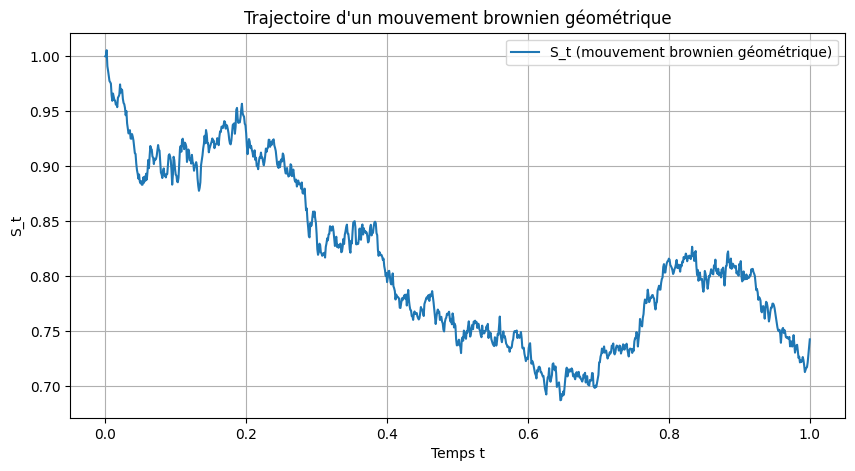

In [ ]:
#Réponse Exercice 4.1

def mouvement_brownien_geometrique(S0=1.0, mu=0.1, sigma=0.2, T=1.0, N=1000):
    #discretiser le temps
    temps = np.linspace(0, T, N + 1)  # N+1 points entre 0 et T
    dt = T / N  # dif du temps

    #simulation du Bt
    B = [0]  # B_0 = 0
    for i in range(N):
        dBt = np.random.normal(0, np.sqrt(dt))
        B.append(B[-1] + dBt)

    #calcul du mouvement brownien geometrique
    S = []
    for i in range(N + 1):
        t = temps[i]
        Bt = B[i]
        #S_t = S_0 * exp[(mu - sigma^2/2)t + sigma * B_t]
        St = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * Bt)
        S.append(St)

    #graphique
    plt.figure(figsize=(10, 5))
    plt.plot(temps, S, label="S_t (mouvement brownien géométrique)")
    plt.xlabel("Temps t")
    plt.ylabel("S_t")
    plt.title("Trajectoire d'un mouvement brownien géométrique")
    plt.grid(True)
    plt.legend()
    plt.show()

mouvement_brownien_geometrique(S0=1.0, mu=0.05, sigma=0.2, T=1.0, N=1000)

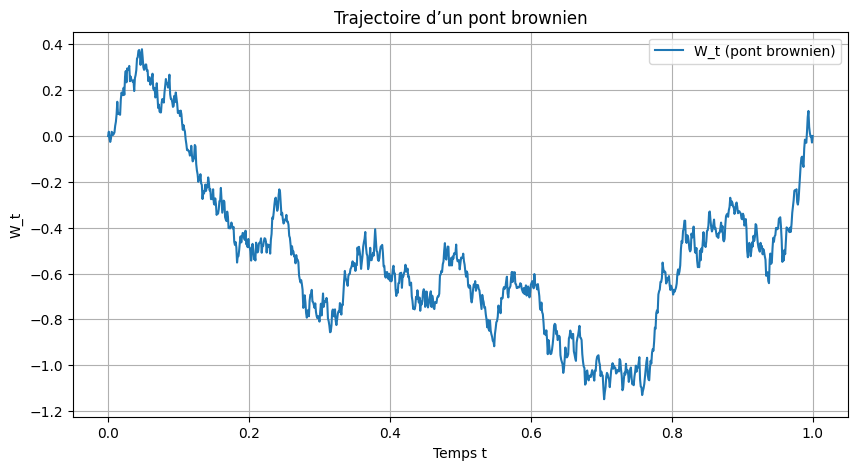

In [ ]:
#Réponse Exercice 4.2

def pont_brownien(T=1.0, N=1000):
    #discretiser le temps
    temps = np.linspace(0, T, N + 1)
    dt = T / N

    #simulation du Bt
    B = [0]
    for i in range(N):
        dBt = np.random.normal(0, np.sqrt(dt))
        B.append(B[-1] + dBt)

    #pont brownien W_t = B_t - t * B_1
    B1 = B[-1]
    W = []
    for i in range(N + 1):
        t = temps[i]
        W_t = B[i] - t * B1
        W.append(W_t)

    #graphique
    plt.figure(figsize=(10, 5))
    plt.plot(temps, W, label="W_t (pont brownien)")
    plt.xlabel("Temps t")
    plt.ylabel("W_t")
    plt.title("Trajectoire d’un pont brownien")
    plt.grid(True)
    plt.legend()
    plt.show()

pont_brownien(T=1.0, N=1000)

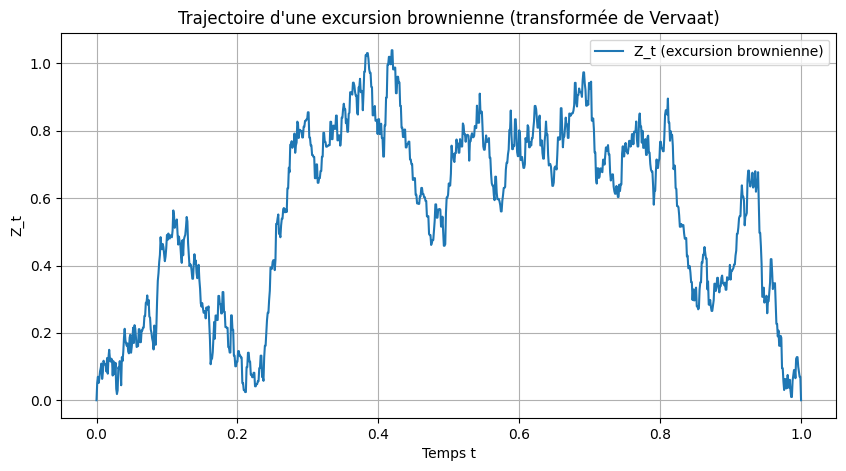

In [ ]:
#Réponse Exercice 4.3

def excursion_brownienne(N=1000):
    T = 1.0

    #discretiser le temps
    temps = np.linspace(0, T, N + 1)
    dt = T / N

    #simulation du B_t
    B = [0]
    for _ in range(N):
        dBt = np.random.normal(0, np.sqrt(dt))
        B.append(B[-1] + dBt)

    #pont brownien W_t = B_t - t * B_1
    B1 = B[-1]
    W = []
    for i in range(N + 1):
        t = temps[i]
        W_t = B[i] - t * B1
        W.append(W_t)

    #temps T où W_t est minimal
    T_index = np.argmin(W)
    W_T = W[T_index]
    T_frac = T_index / N

    #transformée de Vervaat
    Z = []
    for i in range(N + 1):
        t = i / N
        if t <= 1 - T_frac:
            idx = int((T_frac + t) * N)
        else:
            idx = int((T_frac + t - 1) * N)

        idx = np.clip(idx, 0, N)

        Z_t = W[idx] - W_T
        Z.append(Z_t)

    #graphique
    plt.figure(figsize=(10, 5))
    plt.plot(temps, Z, label="Z_t (excursion brownienne)")
    plt.xlabel("Temps t")
    plt.ylabel("Z_t")
    plt.title("Trajectoire d'une excursion brownienne (transformée de Vervaat)")
    plt.grid(True)
    plt.legend()
    plt.show()

excursion_brownienne(N=1000)